# Similaridade Partidária

## Análise dos discursos parlamentares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lendo a base de dados
ano = '2019'
df = pd.read_csv('discursos/discursos_preprocessados_12_2019.csv', sep=";", encoding="utf-8")
df.head()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Partido,Estado,TextoDiscurso
0,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h44,DCD27/02/2019 PAG. 88,FÁBIO TRAD,PSD,MS,presid projet resoluca autor quer agradec tod ...
1,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 86,SILVIO COSTA FILHO,PRB,PE,questa presid quer faz apel exa base art incis...
2,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 87,POMPEO DE MATTOS,PDT,RS,presid quer advert cas contribuint vez aprov r...
3,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 86,JULIO CESAR RIBEIRO,PRB,DF,presid quer diz trist revolt relaca ministr ed...
4,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h36,DCD27/02/2019 PAG. 85,ÁTILA LIRA,PSB,PI,presid sra sr parlament quer registr aqu desap...


In [3]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [9]:
# Retirados partidos sem representantes ou com apenas um representantes na Câmara 
if(ano == '2010'):
    partidos_com_representantes = ['PT', 'PP', 'CIDADANIA', 'PCDOB', 'PMN', 'MDB', 'DEM', 'PSB', 'PDT', 'PTB', 'PL', 'PSDB', 'PV', 'PSC', 
                 'PAN', 'PTC', 'PHS', 'PSOL', 'PRONA'] # Retirado PTDOB E PRB por terem somente um representante
elif(ano in ['2011', '2012', '2013', '2014']):
    partidos_com_representantes = ['PT', 'MDB', 'PL', 'PSB', 'PDT', 'PSC', 'PCDOB', 'REPUBLICANOS', 'PODE', 'PSDB', 'DEM', 'PTB', 'CIDADANIA', 
                 'PMN', 'AVANTE', 'PP', 'PV', 'PSOL', 'PHS', 'PRTB', 'PRP'] # Retirado PTC e PSL por terem somente um representante
elif(ano in ['2015', '2016', '2017', '2018']):
    partidos_com_representantes = ['PT', 'MDB', 'PL', 'PDT', 'REPUBLICANOS', 'PROS', 'PSD', 'PP', 'PSDB', 'DEM', 'PTB', 'PMN', 'SD', 'PTC', 'PODE', 
                'PATRI', 'PSB', 'PRP', 'CIDADANIA', 'PHS', 'PV', 'PSOL', 'PSC', 'DC', 'PCDOB'] # Retirado PCdoB, PRTB e PSL por terem somente um representante
elif(ano == '2019'):
    partidos_com_representantes = ['PT', 'PSL', 'PP', 'MDB', 'PSD', 'PL', 'PSB', 'PRB', 'PSDB', 'DEM', 'PDT', 'SD', 'PODE', 'PTB', 'PSOL', 
                'PCDOB', 'PSC', 'PROS', 'CIDADANIA', 'NOVO', 'AVANTE', 'PHS', 'PATRI', 'PV', 'PRP', 'PMN', 'PTC'] # Retirados DC, PPL e REDE por terem somente um representante


### TF-IDF term frequency–inverse document frequency

In [4]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000
)
tfidf.fit(df['TextoDiscurso'])
text = tfidf.transform(df['TextoDiscurso'])

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['TextoDiscurso'])
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_vectorizer.get_feature_names())
df_tfidf['Parlamentar'] = df['NomeOrador'].tolist()
df_tfidf['Partido'] = df['Partido'].tolist()
df_tfidf = df_tfidf.reindex(['Partido', 'Parlamentar'] + list(df_tfidf.columns[:-2]), axis=1)
df_tfidf.head()

,Partido,Parlamentar,aa,aacd,aara,aba,abad,abaf,abaix,abal,...,zequ,zer,zeza,zik,zomb,zon,zoolog,zootecn,zouain,zygmunt
0,PSD,FÁBIO TRAD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PRB,SILVIO COSTA FILHO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PDT,POMPEO DE MATTOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PRB,JULIO CESAR RIBEIRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PSB,ÁTILA LIRA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Similaridade por Clusterização

### Medição através de clusterização com DBSCAN
O DBSCANalgoritmo vê os clusters como áreas de alta densidade separadas por áreas de baixa densidade. Devido a essa visão um tanto genérica, os clusters encontrados pelo DBSCAN podem ter qualquer formato, ao contrário de k-means, que assume que os clusters têm formato convexo. O componente central do DBSCAN é o conceito de amostras de núcleo , que são amostras que estão em áreas de alta densidade. Um cluster é, portanto, um conjunto de amostras de núcleo, cada uma próxima uma da outra (medida por alguma medida de distância) e um conjunto de amostras não essenciais que estão perto de uma amostra de núcleo (mas não são elas próprias amostras de núcleo). Existem dois parâmetros para o algoritmo, min_samplese eps, que definem formalmente o que queremos dizer quando dizemos denso . Superior min_samplesou inferioreps indicam maior densidade necessária para formar um cluster.

In [6]:
agrupador_dbscan = DBSCAN(eps=1.1, min_samples=5).fit(text)
labels_dbscan = agrupador_dbscan.fit_predict(text)

print("O coeficiente de silhueta do DBSCAN é: ", silhouette_score(text, labels_dbscan))
#print("Labels DBSCAN: ", labels_dbscan)

O coeficiente de silhueta do DBSCAN é:  -0.015514149973494137


### Medição através de clusterização com K-Means

O k-means é o mais popular e mais simples algoritmo particional. K-means foi descoberto independentemente em diferentes campos científicos, primeiramente por STEINHAUS (1956), LLOYD (1982), BALL & HALL (1965) e MACQUEEN (1967) e mesmo tendo sido proposto há mais de 50 anos, ainda é um dos algoritmos mais utilizados para clusterização devido à facilidade de implementação, simplicidade, eficiência e sucesso empírico e possui várias extensões desenvolvidas em várias formas

### Melhorando a aplicação do algoritmo K-Means

O <b>método cotovelo</b> ajuda a encontrar o melhor valor de k. Ele usa a soma das distâncias quadradas [SSE] entre os pontos de dados e seus respectivos centróides ou médias de cluster atribuídos. Em seguida, selecione o valor k na posição em que o SSE começa a achatar e formar um cotovelo.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters


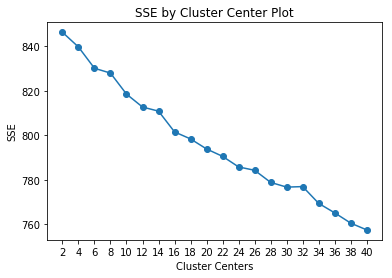

In [7]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 40)

Devido ao gráfico gerado pelo método de cotovelo não formar uma curva acentuada seguida por estabilidade no eixo y, optamos por utilizar a quantidade de partidos com representantes como o número de clusters (k)

In [10]:
k = len(partidos_com_representantes)
print("Atribuído", k, "clusters.")

Atribuído 27 clusters.


In [11]:
clusters = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=12).fit_predict(text)

In [12]:
agrupador_kmeans = KMeans(n_clusters = k)
labels_kmeans = agrupador_kmeans.fit_predict(text)

print("O coeficiente de silhueta do K-means é: ", silhouette_score(text, labels_kmeans))
print("Labels Kmeans: ", labels_kmeans)

O coeficiente de silhueta do K-means é:  0.0006127929284124929
Labels Kmeans:  [ 4  4  9 15  3  9  5 15 12  4 17 15 16 26  4  4  1 17 17 14  9  4 17  1
  9 13 17  9 12 22  4  9 18 17 17  4 17 17 17  0 17  1  4 17  4 11  4  9
 12 12  4  4  7 16 15  9  4 15 22  4  4  1  9 15  7 12 17 12 16  5  8 16
 22  9  0  9  9 13  9  0 12  4 17 16 12 16  1  1  1 18  8 17  9 26 16  9
 26 26  4  8 12 13  4 22 13  9 12  5 17 24 17 18  9 12 26  4 13  9  4  4
 17  9 24  4  9 10  9  4 16 16 16  2 26  4  9 17  7 17 16 15  9 16  1  1
 16  4 21 12  9 12 26 17 26 12  1  4 11 12  1  1  1  4 12 17 16 17  4 12
 17  4  4 11 18 24 24 12  4  9  9  4 12 11  4 25 17 13  4 26  5  9 14  1
 26 17  4 12  1  1 16  6 15 16  1 13 24  4  4 22  4  4 13  4  2 12 12 17
 17  4  9  9  9  4  9  2 12 12 12  9  9 22  9  2  4 12  1  9 12  9 13  4
  4 26  4  9  5  9  9  4  9  9 24 16  9 16  9  5  9  1  7  4 19 18  4  4
 16  9  4  1 26  4  1  9  1  4  6  4  0  9  1  4 17  1 15 17 17 16  1 12
 14 22  4 26  1 16 15 13  1 13 16  4  9  4  5

Selecionando os valores dos 2 maiores clusters

In [13]:
labels = labels_kmeans

clusters_parlamentar = pd.crosstab(df["NomeOrador"], labels)
# removendo partidos com apenas 1 discurso
clusters_parlamentar = clusters_parlamentar[clusters_parlamentar.sum(axis=1) > 1]
print(clusters_parlamentar.shape)
p_partidos = []
for p in clusters_parlamentar.index:
    p_partidos.append(df.query('NomeOrador=="'+p+'"')['Partido'][:1].tolist()[0])
clusters_parlamentar['Partido'] = p_partidos
clusters_parlamentar.reset_index(inplace=True)
clusters_parlamentar = clusters_parlamentar.reindex(['Partido'] + list(clusters_parlamentar.columns[:-2]), axis=1)
clusters_parlamentar.head()

(177, 27)


col_0,Partido,NomeOrador,0,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,25
0,PSL,ABOU ANNI,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PT,AFONSO FLORENCE,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PP,AFONSO HAMM,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,3,0,0,0
3,PDT,AFONSO MOTTA,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PT,AIRTON FALEIRO,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
import heapq
dfc = clusters_parlamentar.groupby(['Partido']).sum()
dfc=dfc.reset_index()
lst = dfc.values.tolist()
partido = []
soma_2_k = []
soma_total = []
score = []
anos = []
clusteres = []
cluster1 = []
vlrcluster1 = []
cluster2 = []
vlrcluster2 = []
for i in lst:
    # se o partido tiver 5 ou mais discursos
    if(sum(i[1:]) >= 5):
        # Selecionando os valores dos 3 maiores clusters
        valores = heapq.nlargest(2,i[1:])
        
        # Selecionando o cluster pelos maiores valores
        klusters = ''
        pos1 = i.index(valores[0])
        pos2 = i.index(valores[1])
        # Se houver o mesmo valor em mais de um cluster
        if(pos1 == pos2):
            pos1 = [k for k, item in enumerate(i) if item == valores[0]][0]
            pos2 = [k for k, item in enumerate(i) if item == valores[0]][1]
        klusters = "k" + str(pos1) + ": " + str(valores[0]) + " - k" + str(pos2) + ": "+ str(valores[1])
        cluster1.append(pos1)
        vlrcluster1.append(valores[0])
        cluster2.append(pos2)
        vlrcluster2.append(valores[1])
        
        partido.append(i[0])
        soma_2_k.append(sum(valores))
        soma_total.append(sum(i[1:]))
        score.append(sum(valores)/sum(i[1:]))
        anos.append(ano)
        clusteres.append(klusters)
        
df_score_clusters = pd.DataFrame()
df_score_clusters['Ano'] = anos
df_score_clusters['Partido'] = partido
df_score_clusters['soma_2_clusters'] = soma_2_k
df_score_clusters['soma_total'] = soma_total
df_score_clusters['Score_GE'] = score
#df_score_clusters['Clusteres'] = clusteres
df_score_clusters['Cluster1'] = cluster1
df_score_clusters['VlrCluster1'] = vlrcluster1
df_score_clusters['Cluster2'] = cluster2
df_score_clusters['VlrCluster2'] = vlrcluster2
df_score_clusters

,Ano,Partido,soma_2_clusters,soma_total,Score_GE,Cluster1,VlrCluster1,Cluster2,VlrCluster2
0,2019,AVANTE,3,5,0.600000,5,2,2,1
1,2019,CIDADANIA,8,15,0.533333,2,5,5,3
2,2019,DEM,7,14,0.500000,2,5,5,2
3,2019,MDB,13,29,0.448276,2,7,5,6
4,2019,NOVO,5,11,0.454545,18,3,1,2
5,2019,PCDOB,17,37,0.459459,14,9,2,8
6,2019,PDT,12,36,0.333333,5,6,13,6
7,2019,PL,11,21,0.523810,18,7,5,4
8,2019,PODE,5,17,0.294118,5,3,10,2
9,2019,PP,6,14,0.428571,5,3,23,3


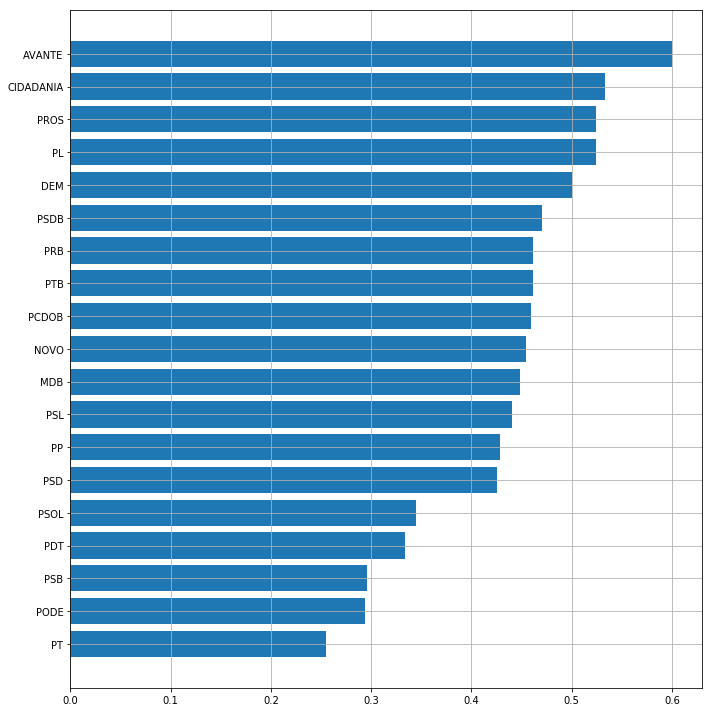

In [15]:
df_score_clusters = df_score_clusters.sort_values(['Score_GE'])
fig = plt.figure(figsize=(10,10))
plt.barh(df_score_clusters['Partido'], df_score_clusters['Score_GE'])
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
partido = []
parlamentar = []
cluster1 = []
cluster2 = []
total_d = []
for x,y,z in zip(df_score_clusters['Partido'],df_score_clusters['Cluster1'],df_score_clusters['Cluster2']):
    df_k_parlamentar = clusters_parlamentar.query("Partido=='"+x+"'")
    for a, b, c in zip(df_k_parlamentar['NomeOrador'], df_k_parlamentar[(y -1)], df_k_parlamentar[(z -1)]):
        #print(x, a,"|",y,"->",b,"|",z,"->",c)
        parlamentar.append(a)
        partido.append(x)
        cluster1.append(b)
        cluster2.append(c)
        ss = clusters_parlamentar.query('NomeOrador=="'+a+'"')
        ss.drop(['Partido', 'NomeOrador'], axis=1, inplace=True)
        total_d.append(ss.values.sum())
df_deputado_k = pd.DataFrame()
df_deputado_k['Partido'] = partido
df_deputado_k['Parlamentar'] = parlamentar
df_deputado_k['Cluster1'] = cluster1
df_deputado_k['Cluster2'] = cluster2
df_deputado_k['Total'] = total_d

df_deputado_k['Percentual'] = (df_deputado_k['Cluster1'] + df_deputado_k['Cluster2']) / df_deputado_k['Total']
df_deputado_k.head()

/Users/Polato/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Partido,Parlamentar,Cluster1,Cluster2,Total,Percentual
0,PT,AFONSO FLORENCE,0,0,3,0.000000
1,PT,AIRTON FALEIRO,0,1,7,0.142857
2,PT,ALEXANDRE PADILHA,1,0,5,0.200000
3,PT,ASSIS CARVALHO,1,0,3,0.333333
4,PT,BENEDITA DA SILVA,0,1,8,0.125000


In [17]:
df_score_clusters.to_csv('score/score_ge_2019.csv', sep=';', index=False)

PT


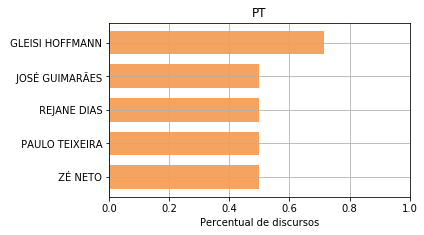

PODE


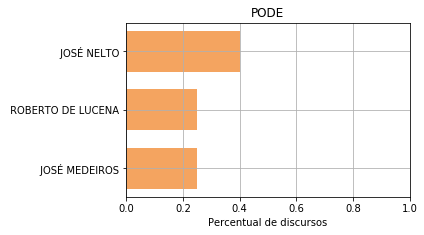

PSB


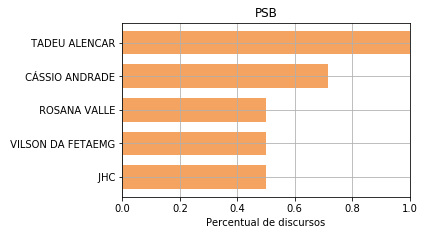

PDT


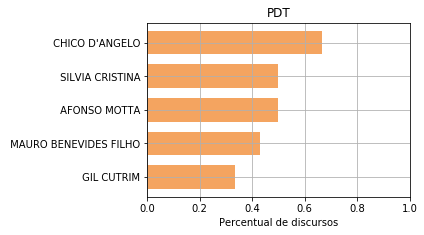

PSOL


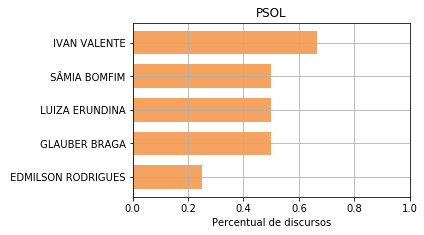

PSD


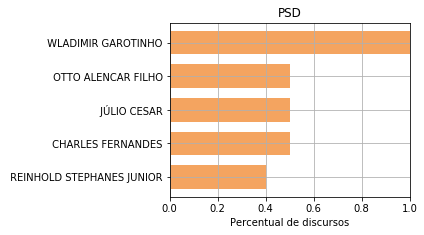

PP


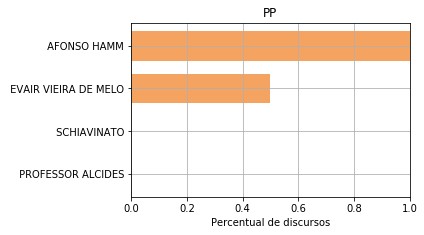

PSL


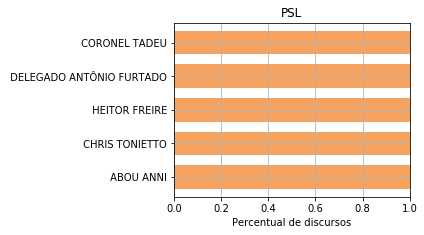

MDB


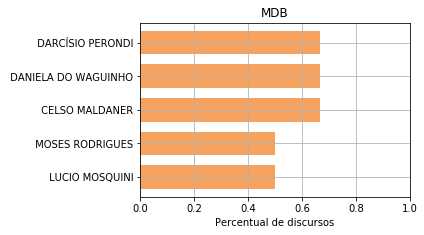

NOVO


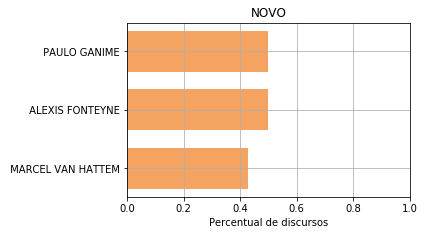

PCDOB


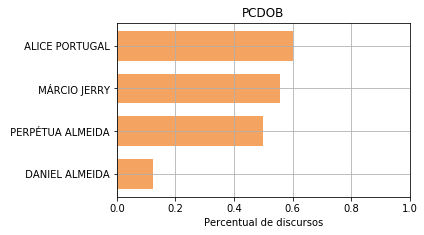

PTB


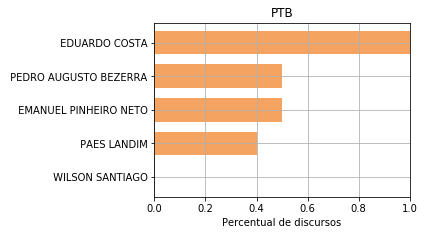

PRB


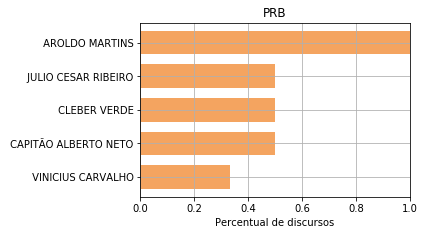

PSDB


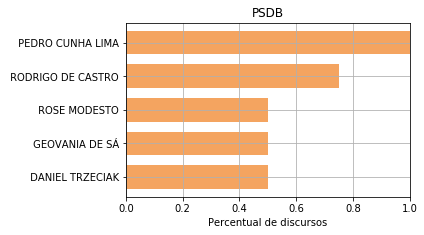

DEM


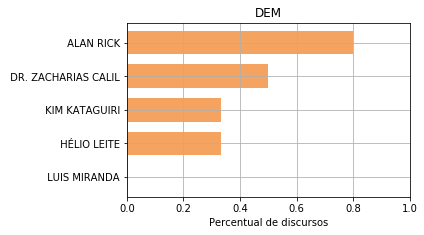

PL


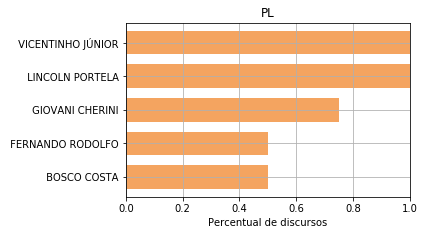

PROS


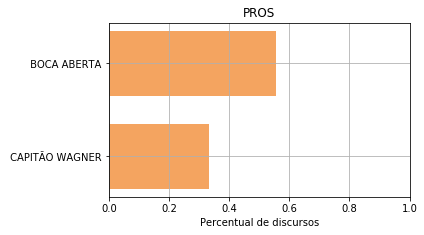

CIDADANIA


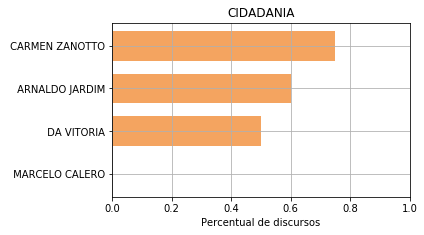

AVANTE


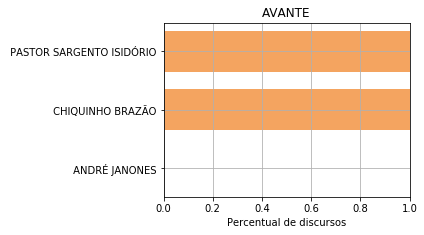

In [18]:
for i in df_score_clusters.Partido.tolist():
    dfk = df_deputado_k.query('Partido=="'+i+'"').sort_values(['Percentual'], ascending=False)[:5]
    dfk = dfk.sort_values(['Percentual'], ascending=True)
    print(i)
    width = 0.7
    fig = plt.figure(figsize=(6,3))
    plt.barh(dfk['Parlamentar'], dfk['Percentual'], width, color='#F4A460')
    plt.grid()
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.title(i)
    plt.xlabel('Percentual de discursos')
    plt.show()

Alterar o partido para pesquisar a contribuição dos parlamentares para o resultado do indicador

In [20]:
partido = "PT"
df_deputado_k.query('Partido=="'+partido+'"').sort_values(['Percentual'], ascending=False)

,Partido,Parlamentar,Cluster1,Cluster2,Total,Percentual
13,PT,GLEISI HOFFMANN,5,0,7,0.714286
41,PT,ZÉ NETO,4,2,12,0.500000
30,PT,PAULO TEIXEIRA,0,1,2,0.500000
34,PT,REJANE DIAS,0,1,2,0.500000
18,PT,JOSÉ GUIMARÃES,1,0,2,0.500000
6,PT,BOHN GASS,1,2,6,0.500000
14,PT,HENRIQUE FONTANA,3,1,9,0.444444
16,PT,JOSEILDO RAMOS,0,4,9,0.444444
33,PT,REGINALDO LOPES,2,1,7,0.428571
35,PT,ROGÉRIO CORREIA,2,1,7,0.428571
